In [6]:
import math
import numpy as np
import json
import pandas as pd
import glob

from src.constants import OUTPUTS_DIR

In [7]:
experiment_file = OUTPUTS_DIR / "estimate_divergence_of_iterated_bcjr_variable_blocklen_num_iter.json"

In [8]:
with open(experiment_file, "r") as e:
    results = json.load(e)

exp_results = pd.DataFrame([{**d["results"], **d["preamble"]["args"], **d["preamble"]}for d in results["data"] if "results" in d])
exp_results.head()
# I don't think it actually makes sense to take mean of ce_err
# exp_results = exp_results.groupby(["snr", "decoder_type", "block_len", "encoder_name"]).agg({"xe__mean": "mean", "xe__err": "mean"}).reset_index(drop=False)
exp_results = exp_results[exp_results["encoder_name"] == "conv_15_7_00"]
exp_results = exp_results.groupby(["snr", "decoder_type", "block_len"]).agg({"xe__mean": "mean", "xe__err": "mean"}).reset_index(drop=False)

snr_vals = [2.0]
exp_results = exp_results[exp_results["snr"].isin(snr_vals)]
# exp_results = exp_results[["xe__mean", "xe__err", "block_len", "decoder_type", "snr", "encoder_name"]]
exp_results = exp_results[["xe__mean", "xe__err", "block_len", "decoder_type", "snr"]]

In [9]:

exp_results.head()

,xe__mean,xe__err,block_len,decoder_type,snr
111,0.014190,0.002024,5,brute_force,2.0
112,0.009358,0.001876,8,brute_force,2.0
113,0.003850,0.000787,11,brute_force,2.0
114,0.004923,0.000768,14,brute_force,2.0
115,0.001985,0.000575,16,brute_force,2.0


/tmp/ipykernel_22775/2600729678.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


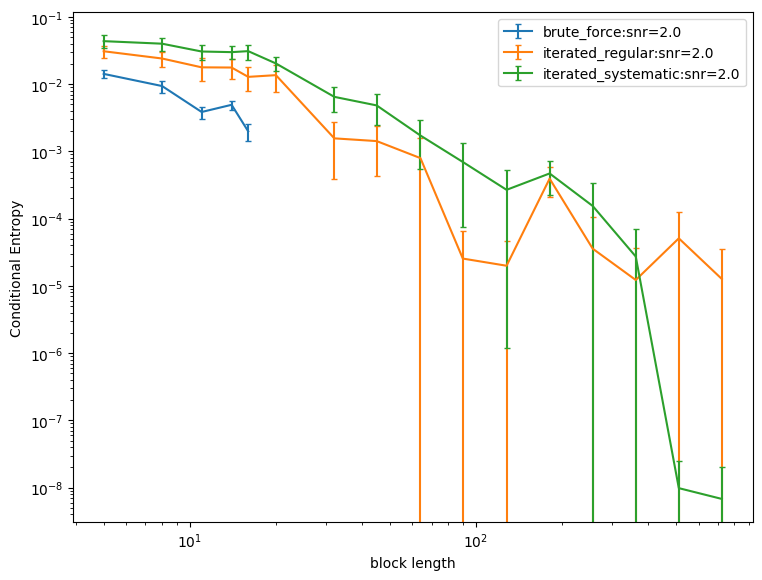

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_axes([0.1, 0.1, .85, .85])  # Last two terms control height and width
capsize = 2

# for (snr, decoder_type, enc_name), exp_result in exp_results.groupby(["snr", "decoder_type", "encoder_name"]):
#     ax.errorbar(
#         exp_result["block_len"][:10], 
#         exp_result["xe__mean"][:10], 
#         yerr=exp_result["xe__err"][:10], 
#         linestyle='-',
#         capsize=capsize,
#         label=f"{enc_name}:{decoder_type}:snr={snr}"
#     )

for (snr, decoder_type), exp_result in exp_results.groupby(["snr", "decoder_type"]):
    ax.errorbar(
        exp_result["block_len"], 
        exp_result["xe__mean"], 
        yerr=exp_result["xe__err"], 
        linestyle='-',
        capsize=capsize,
        label=f"{decoder_type}:snr={snr}"
    )
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('block length')
ax.set_ylabel('Conditional Entropy')

fig.show()